In [1]:
import pandas as pd
import os
from functools import reduce
import ast
import numpy as np

In [4]:
folderpath = r"/Users/lysi2/Documents/Fitbit_project/KyriacosXanthos/user-site-export" # make sure to put the 'r' in front
filepaths  = [os.path.join(folderpath, name) for name in os.listdir(folderpath)]

for path in filepaths:
    xl_name = path.split('/Users/lysi2/Documents/Fitbit_project/KyriacosXanthos/user-site-export')
    xl_name2 = xl_name[1].split('.')
    pd.read_json("{}".format(path)).to_excel("/Users/lysi2/Documents/Fitbit_project/KyriacosXanthos/excel/{}.xlsx".format(xl_name2[0]))

In [5]:
folderpath2 = r"/Users/lysi2/Documents/Fitbit_project/KyriacosXanthos/excel" # make sure to put the 'r' in front
filepaths2  = [os.path.join(folderpath2, name) for name in os.listdir(folderpath2)]

dictionary = {}  
for path in filepaths2:  
    key = os.path.basename(path).split('-')[0]
    group = dictionary.get(key,[])
    group.append(path)  
    dictionary[key] = group
    
for key in dictionary:
    excel_names = dictionary[key]
    # read them in
    excels = [pd.ExcelFile(name) for name in excel_names]
    # turn them into dataframes
    frames = [x.parse(x.sheet_names[0], header=None,index_col=None) for x in excels]
    # delete the first row for all frames except the first
    # i.e. remove the header row -- assumes it's the first
    frames[1:] = [df[1:] for df in frames[1:]]
    # concatenate them..
    combined = pd.concat(frames)
    # write it out
    combined.to_excel("combined_{}.xlsx".format(key), header=False, index=False)

In [6]:
sleep_score = pd.read_csv('/Users/lysi2/Documents/Fitbit_project/KyriacosXanthos/sleep-score/sleep_score.csv')

In [7]:
steps = pd.read_excel('/Users/lysi2/Documents/Fitbit_project/KyriacosXanthos/excel_combined/combined_steps.xlsx')

In [8]:
calories = pd.read_excel('/Users/lysi2/Documents/Fitbit_project/KyriacosXanthos/excel_combined/combined_calories.xlsx')

In [9]:
distance = pd.read_excel('/Users/lysi2/Documents/Fitbit_project/KyriacosXanthos/excel_combined/combined_distance.xlsx')

In [10]:
heart_rate = pd.read_excel('/Users/lysi2/Documents/Fitbit_project/KyriacosXanthos/excel_combined/combined_heart_rate.xlsx')

In [11]:
resting_heart_rate = pd.read_excel('/Users/lysi2/Documents/Fitbit_project/KyriacosXanthos/excel_combined/combined_resting_heart_rate.xlsx')

In [12]:
sedentary_minutes = pd.read_excel('/Users/lysi2/Documents/Fitbit_project/KyriacosXanthos/excel_combined/combined_sedentary_minutes.xlsx')
minutes_very_active = pd.read_excel('/Users/lysi2/Documents/Fitbit_project/KyriacosXanthos/excel_combined/combined_very_active_minutes.xlsx')
minutes_moderately_active = pd.read_excel('/Users/lysi2/Documents/Fitbit_project/KyriacosXanthos/excel_combined/combined_moderately_active_minutes.xlsx')
minutes_lightly_active = pd.read_excel('/Users/lysi2/Documents/Fitbit_project/KyriacosXanthos/excel_combined/combined_lightly_active_minutes.xlsx')

In [13]:
data_frames = [sedentary_minutes, minutes_very_active, minutes_moderately_active, minutes_lightly_active]
activity = reduce(lambda  left,right: pd.merge(left,right,on=['dateTime'],
                                            how='outer'), data_frames)

In [14]:
activity = activity.drop(['Unnamed: 0_x', 'Unnamed: 0_y'], axis = 1)

In [15]:
activity.columns = ['dateTime', 'sedentary_minutes', 'minutes_very_active', 'minutes_moderately_active', 'minutes_lightly_active']

In [16]:
activity.head()

dateTime  sedentary_minutes  minutes_very_active  \
0 2020-05-25               1440                    0   
1 2020-05-26               1338                    0   
2 2020-05-27                801                   10   
3 2020-05-28                622                   29   
4 2020-05-29                763                    0   

   minutes_moderately_active  minutes_lightly_active  
0                          0                       0  
1                          0                     102  
2                          8                     175  
3                         21                     272  
4                          0                     196

In [17]:
steps = steps.groupby(steps.dateTime.dt.date, sort=False)['value'].sum().reset_index(name ='Total_Steps')

In [18]:
calories = calories.groupby(calories.dateTime.dt.date, sort=False)['value'].sum().reset_index(name ='Total_Calories')

In [19]:
distance = distance.groupby(distance.dateTime.dt.date, sort=False)['value'].sum().reset_index(name ='Total_Distance')

In [20]:
sleep_score = sleep_score[['timestamp', 'overall_score']]

In [21]:
steps.head()

dateTime  Total_Steps
0  2020-05-26         2732
1  2020-05-27         5604
2  2020-05-28        10072
3  2020-05-29         5138
4  2020-05-30        10473

In [22]:
calories.head()

dateTime  Total_Calories
0  2020-06-24         2617.46
1  2020-06-25         2176.88
2  2020-06-26         2827.18
3  2020-06-27         3234.91
4  2020-06-28         3105.49

In [23]:
distance.head()

dateTime  Total_Distance
0  2020-05-26          202320
1  2020-05-27          472130
2  2020-05-28          710300
3  2020-05-29          380510
4  2020-05-30          776330

In [24]:
sleep_score.head()

timestamp  overall_score
0  2020-07-14T09:59:00Z             80
1  2020-07-13T11:07:30Z             81
2  2020-07-12T10:23:30Z             75
3  2020-07-11T11:48:00Z             81
4  2020-07-10T10:23:30Z             80

In [25]:
resting_heart_rate.head()

Unnamed: 0   dateTime                                              value
0           0 2020-05-25         {'date': None, 'value': 0.0, 'error': 0.0}
1           1 2020-05-26  {'date': '05/26/20', 'value': 61.0, 'error': 1...
2           2 2020-05-27  {'date': '05/27/20', 'value': 60.3813514709472...
3           3 2020-05-28  {'date': '05/28/20', 'value': 59.3702516555786...
4           4 2020-05-29  {'date': '05/29/20', 'value': 59.8794879913330...

In [26]:
#type(resting_heart_rate['value'][0])
resting_heart_rate['dict_value'] = ""
resting_heart_rate['resting_heart_rate'] = ""
for i in range(len(resting_heart_rate)):
    resting_heart_rate['dict_value'][i] = ast.literal_eval(resting_heart_rate['value'][i])
    for key in resting_heart_rate['dict_value'][i]:
        resting_heart_rate['resting_heart_rate'][i] = resting_heart_rate['dict_value'][i]['value']

/Users/lysi2/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/lysi2/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [27]:
resting_heart_rate = resting_heart_rate[['dateTime', 'resting_heart_rate']]

In [28]:
resting_heart_rate.head()

dateTime resting_heart_rate
0 2020-05-25                  0
1 2020-05-26                 61
2 2020-05-27            60.3814
3 2020-05-28            59.3703
4 2020-05-29            59.8795

In [29]:
sleep_score['dateTime'] = pd.to_datetime(sleep_score['timestamp'])

In [30]:
sleep_score['dateTime'] = sleep_score['dateTime'].dt.date

In [31]:
sleep_score = sleep_score.drop(['timestamp'], axis = 1)

In [32]:
sleep_score.head()

overall_score    dateTime
0             80  2020-07-14
1             81  2020-07-13
2             75  2020-07-12
3             81  2020-07-11
4             80  2020-07-10

In [33]:
sleep_score['dateTime'] = pd.to_datetime(sleep_score['dateTime'])

In [34]:
steps['dateTime'] = pd.to_datetime(steps['dateTime'])

In [35]:
calories['dateTime'] = pd.to_datetime(calories['dateTime'])

In [36]:
distance['dateTime'] = pd.to_datetime(distance['dateTime'])

In [37]:
resting_heart_rate['dateTime'] = pd.to_datetime(resting_heart_rate['dateTime'])

In [38]:
data_frames = [activity, steps, calories, distance, sleep_score, resting_heart_rate]
final_df = reduce(lambda  left,right: pd.merge(left,right,on=['dateTime'],
                                            how='outer'), data_frames)

In [39]:
final_df['day'] = final_df['dateTime'].dt.day_name()

In [40]:
final_df['is_weekend'] = np.where((final_df.day == 'Saturday') | (final_df.day == 'Sunday'), 'Y', 'N')

In [41]:
final_df['success_steps'] = np.where(final_df.Total_Steps >= 10000, 'Y', 'N')

In [42]:
final_df

dateTime  sedentary_minutes  minutes_very_active  \
0   2020-05-25             1440.0                  0.0   
1   2020-05-26             1338.0                  0.0   
2   2020-05-27              801.0                 10.0   
3   2020-05-28              622.0                 29.0   
4   2020-05-29              763.0                  0.0   
..         ...                ...                  ...   
360 2021-05-20                NaN                  NaN   
361 2021-05-21                NaN                  NaN   
362 2021-05-22                NaN                  NaN   
363 2021-05-23                NaN                  NaN   
364 2021-05-24                NaN                  NaN   

     minutes_moderately_active  minutes_lightly_active  Total_Steps  \
0                          0.0                     0.0          NaN   
1                          0.0                   102.0       2732.0   
2                          8.0                   175.0       5604.0   
3                         21.0                   272.0      10072.0   
4                          0.0                   196.0       5138.0   
..                         ...                     ...          ...   
360                        NaN                     NaN          NaN   
361                        NaN                     NaN          NaN   
362                        NaN                     NaN          NaN   
363                        NaN                     NaN          NaN   
364                        NaN                     NaN          NaN   

     Total_Calories  Total_Distance  overall_score resting_heart_rate  \
0           1670.40             NaN            NaN                  0   
1           1965.62        202320.0            NaN                 61   
2           2387.63        472130.0           77.0            60.3814   
3           2949.08        710300.0           80.0            59.3703   
4           2348.20        380510.0           74.0            59.8795   
..              ...             ...            ...                ...   
360             NaN             NaN            NaN                  0   
361             NaN             NaN            NaN                  0   
362             NaN             NaN            NaN                  0   
363             NaN             NaN            NaN                  0   
364             NaN             NaN            NaN                  0   

           day is_weekend success_steps  
0       Monday          N             N  
1      Tuesday          N             N  
2    Wednesday          N             N  
3     Thursday          N             Y  
4       Friday          N             N  
..         ...        ...           ...  
360   Thursday          N             N  
361     Friday          N             N  
362   Saturday          Y             N  
363     Sunday          Y             N  
364     Monday          N             N  

[365 rows x 13 columns]

In [43]:
sleep = pd.read_excel('/Users/lysi2/Documents/Fitbit_project/KyriacosXanthos/excel_combined/combined_sleep.xlsx')

In [44]:
sleep.head()

Unnamed: 0        logId dateOfSleep                startTime  \
0           0  27750858592  2020-06-24  2020-06-24T01:37:00.000   
1           1  27736021488  2020-06-23  2020-06-23T02:16:00.000   
2           2  27726219942  2020-06-22  2020-06-22T00:45:30.000   
3           3  27710463968  2020-06-21  2020-06-21T03:17:00.000   
4           4  27697538410  2020-06-20  2020-06-20T02:30:30.000   

                   endTime  duration  minutesToFallAsleep  minutesAsleep  \
0  2020-06-24T10:51:30.000  33240000                    0            474   
1  2020-06-23T08:32:30.000  22560000                    0            320   
2  2020-06-22T10:12:00.000  33960000                    0            493   
3  2020-06-21T09:45:30.000  23280000                    0            351   
4  2020-06-20T08:48:30.000  22680000                    0            330   

   minutesAwake  minutesAfterWakeup  timeInBed  efficiency    type  infoCode  \
0            80                   0        554          94  stages         0   
1            56                   0        376          89  stages         0   
2            73                   0        566          95  stages         0   
3            37                   0        388          95  stages         0   
4            48                   0        378          90  stages         0   

                                              levels  mainSleep  
0  {'summary': {'deep': {'count': 4, 'minutes': 8...       True  
1  {'summary': {'deep': {'count': 4, 'minutes': 6...       True  
2  {'summary': {'deep': {'count': 4, 'minutes': 1...       True  
3  {'summary': {'deep': {'count': 5, 'minutes': 9...       True  
4  {'summary': {'deep': {'count': 7, 'minutes': 8...       True

In [45]:
sleep['dict_levels'] = ""
sleep['deep'] = ""
sleep['wake'] = ""
sleep['light'] = ""
sleep['rem'] = ""
sleep['restless'] = ""
sleep['awake'] = ""
sleep['asleep'] = ""
for i in range(len(sleep)):
    sleep['dict_levels'][i] = ast.literal_eval(sleep['levels'][i])
    for key in sleep['dict_levels'][i]['summary']:
        sleep[key][i] = sleep['dict_levels'][i]['summary'][key]['minutes']

/Users/lysi2/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/lysi2/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [46]:
sleep = sleep[['dateOfSleep', 'deep', 'wake', 'light', 'rem', 'restless', 'awake', 'asleep']]

In [47]:
sleep = sleep.rename(columns={"dateOfSleep": "dateTime"})

In [48]:
sleep['dateTime'] = pd.to_datetime(sleep['dateTime'])

In [49]:
sleep.dtypes

dateTime    datetime64[ns]
deep                object
wake                object
light               object
rem                 object
restless            object
awake               object
asleep              object
dtype: object

In [50]:
sleep.head()

dateTime deep wake light  rem restless awake asleep
0 2020-06-24   81   80   324   69                      
1 2020-06-23   62   56   232   26                      
2 2020-06-22  157   73   229  107                      
3 2020-06-21   90   37   209   52                      
4 2020-06-20   89   48   209   32

In [51]:
data_frames = [final_df, sleep]
final_df = reduce(lambda  left,right: pd.merge(left,right,on=['dateTime'],
                                            how='outer'), data_frames)

In [52]:
final_df.columns

Index(['dateTime', 'sedentary_minutes', 'minutes_very_active',
       'minutes_moderately_active', 'minutes_lightly_active', 'Total_Steps',
       'Total_Calories', 'Total_Distance', 'overall_score',
       'resting_heart_rate', 'day', 'is_weekend', 'success_steps', 'deep',
       'wake', 'light', 'rem', 'restless', 'awake', 'asleep'],
      dtype='object')

In [53]:
final_df.head()

dateTime  sedentary_minutes  minutes_very_active  \
0 2020-05-25             1440.0                  0.0   
1 2020-05-26             1338.0                  0.0   
2 2020-05-27              801.0                 10.0   
3 2020-05-28              622.0                 29.0   
4 2020-05-29              763.0                  0.0   

   minutes_moderately_active  minutes_lightly_active  Total_Steps  \
0                        0.0                     0.0          NaN   
1                        0.0                   102.0       2732.0   
2                        8.0                   175.0       5604.0   
3                       21.0                   272.0      10072.0   
4                        0.0                   196.0       5138.0   

   Total_Calories  Total_Distance  overall_score resting_heart_rate  \
0         1670.40             NaN            NaN                  0   
1         1965.62        202320.0            NaN                 61   
2         2387.63        472130.0           77.0            60.3814   
3         2949.08        710300.0           80.0            59.3703   
4         2348.20        380510.0           74.0            59.8795   

         day is_weekend success_steps deep wake light  rem restless awake  \
0     Monday          N             N  NaN  NaN   NaN  NaN      NaN   NaN   
1    Tuesday          N             N  NaN  NaN   NaN  NaN      NaN   NaN   
2  Wednesday          N             N  117   51   217   61                  
3   Thursday          N             Y  115   66   268   47                  
4     Friday          N             N  115   75   226   65                  

  asleep  
0    NaN  
1    NaN  
2         
3         
4

In [54]:
new_df = final_df.dropna()

In [55]:
new_df

dateTime  sedentary_minutes  minutes_very_active  \
2  2020-05-27              801.0                 10.0   
3  2020-05-28              622.0                 29.0   
4  2020-05-29              763.0                  0.0   
5  2020-05-30              741.0                 65.0   
6  2020-05-31              811.0                  1.0   
7  2020-06-01              657.0                  0.0   
8  2020-06-02              715.0                  0.0   
9  2020-06-03              767.0                  0.0   
10 2020-06-04              754.0                  0.0   
11 2020-06-05              668.0                 21.0   
12 2020-06-06              525.0                 30.0   
13 2020-06-07              614.0                 46.0   
14 2020-06-08              655.0                  8.0   
15 2020-06-09              740.0                  0.0   
16 2020-06-10              714.0                  0.0   
17 2020-06-11              755.0                  0.0   
18 2020-06-12              707.0                  1.0   
19 2020-06-13              745.0                 10.0   
20 2020-06-14              410.0                 26.0   
21 2020-06-15              632.0                 31.0   
22 2020-06-16              621.0                 12.0   
23 2020-06-17              633.0                  2.0   
24 2020-06-18              687.0                  7.0   
25 2020-06-19              752.0                 21.0   
26 2020-06-20              697.0                 21.0   
27 2020-06-21              654.0                 27.0   
28 2020-06-22              625.0                  3.0   
29 2020-06-23              720.0                  0.0   
30 2020-06-24              587.0                  0.0   
31 2020-06-24              587.0                  0.0   
32 2020-06-25              820.0                  0.0   
33 2020-06-26              656.0                  0.0   
34 2020-06-27              532.0                 26.0   
35 2020-06-28              556.0                 13.0   
36 2020-06-29              591.0                  4.0   
37 2020-06-30              546.0                  7.0   
38 2020-07-01              621.0                  0.0   
39 2020-07-02              752.0                  0.0   
40 2020-07-03              540.0                  1.0   
41 2020-07-04              585.0                 12.0   
42 2020-07-05              604.0                 50.0   
43 2020-07-06              592.0                  0.0   
44 2020-07-07              679.0                  0.0   
45 2020-07-08              694.0                  0.0   
46 2020-07-09              803.0                  2.0   
47 2020-07-10              657.0                 17.0   
48 2020-07-11              509.0                 29.0   
49 2020-07-12              593.0                 52.0   
50 2020-07-13              604.0                  6.0   
51 2020-07-14              746.0                  7.0   

    minutes_moderately_active  minutes_lightly_active  Total_Steps  \
2                         8.0                   175.0       5604.0   
3                        21.0                   272.0      10072.0   
4                         0.0                   196.0       5138.0   
5                         6.0                   178.0      10473.0   
6                         9.0                   162.0       4463.0   
7                         0.0                   268.0       6990.0   
8                         0.0                   235.0       4883.0   
9                         0.0                   178.0       2924.0   
10                        0.0                   198.0       4211.0   
11                       12.0                   238.0       7751.0   
12                       21.0                   368.0      10676.0   
13                       61.0                   298.0      14531.0   
14                       21.0                   250.0       7991.0   
15                        0.0                   256.0       6193.0   
16                        0.0                  

In [56]:
len(new_df)

50

In [57]:
final_df

dateTime  sedentary_minutes  minutes_very_active  \
0   2020-05-25             1440.0                  0.0   
1   2020-05-26             1338.0                  0.0   
2   2020-05-27              801.0                 10.0   
3   2020-05-28              622.0                 29.0   
4   2020-05-29              763.0                  0.0   
..         ...                ...                  ...   
361 2021-05-20                NaN                  NaN   
362 2021-05-21                NaN                  NaN   
363 2021-05-22                NaN                  NaN   
364 2021-05-23                NaN                  NaN   
365 2021-05-24                NaN                  NaN   

     minutes_moderately_active  minutes_lightly_active  Total_Steps  \
0                          0.0                     0.0          NaN   
1                          0.0                   102.0       2732.0   
2                          8.0                   175.0       5604.0   
3                         21.0                   272.0      10072.0   
4                          0.0                   196.0       5138.0   
..                         ...                     ...          ...   
361                        NaN                     NaN          NaN   
362                        NaN                     NaN          NaN   
363                        NaN                     NaN          NaN   
364                        NaN                     NaN          NaN   
365                        NaN                     NaN          NaN   

     Total_Calories  Total_Distance  overall_score resting_heart_rate  \
0           1670.40             NaN            NaN                  0   
1           1965.62        202320.0            NaN                 61   
2           2387.63        472130.0           77.0            60.3814   
3           2949.08        710300.0           80.0            59.3703   
4           2348.20        380510.0           74.0            59.8795   
..              ...             ...            ...                ...   
361             NaN             NaN            NaN                  0   
362             NaN             NaN            NaN                  0   
363             NaN             NaN            NaN                  0   
364             NaN             NaN            NaN                  0   
365             NaN             NaN            NaN                  0   

           day is_weekend success_steps deep wake light  rem restless awake  \
0       Monday          N             N  NaN  NaN   NaN  NaN      NaN   NaN   
1      Tuesday          N             N  NaN  NaN   NaN  NaN      NaN   NaN   
2    Wednesday          N             N  117   51   217   61                  
3     Thursday          N             Y  115   66   268   47                  
4       Friday          N             N  115   75   226   65                  
..         ...        ...           ...  ...  ...   ...  ...      ...   ...   
361   Thursday          N             N  NaN  NaN   NaN  NaN      NaN   NaN   
362     Friday          N             N  NaN  NaN   NaN  NaN      NaN   NaN   
363   Saturday          Y             N  NaN  NaN   NaN  NaN      NaN   NaN   
364     Sunday          Y             N  NaN  NaN   NaN  NaN      NaN   NaN   
365     Monday          N             N  NaN  NaN   NaN  NaN      NaN   NaN   

    asleep  
0      NaN  
1      NaN  
2           
3           
4           
..     ...  
361    NaN  
362    NaN  
363    NaN  
364    NaN  
365    NaN  

[366 rows x 20 columns]

In [58]:
final_df.to_csv(r"/Users/lysi2/Documents/Fitbit_project/KyriacosXanthos/final_df.csv", index = False)

In [59]:
new_df.columns

Index(['dateTime', 'sedentary_minutes', 'minutes_very_active',
       'minutes_moderately_active', 'minutes_lightly_active', 'Total_Steps',
       'Total_Calories', 'Total_Distance', 'overall_score',
       'resting_heart_rate', 'day', 'is_weekend', 'success_steps', 'deep',
       'wake', 'light', 'rem', 'restless', 'awake', 'asleep'],
      dtype='object')

In [60]:
new_df.head()

dateTime  sedentary_minutes  minutes_very_active  \
2 2020-05-27              801.0                 10.0   
3 2020-05-28              622.0                 29.0   
4 2020-05-29              763.0                  0.0   
5 2020-05-30              741.0                 65.0   
6 2020-05-31              811.0                  1.0   

   minutes_moderately_active  minutes_lightly_active  Total_Steps  \
2                        8.0                   175.0       5604.0   
3                       21.0                   272.0      10072.0   
4                        0.0                   196.0       5138.0   
5                        6.0                   178.0      10473.0   
6                        9.0                   162.0       4463.0   

   Total_Calories  Total_Distance  overall_score resting_heart_rate  \
2         2387.63        472130.0           77.0            60.3814   
3         2949.08        710300.0           80.0            59.3703   
4         2348.20        380510.0           74.0            59.8795   
5         2732.76        776330.0           74.0            59.5909   
6         2235.47        324050.0           74.0             59.851   

         day is_weekend success_steps deep wake light rem restless awake  \
2  Wednesday          N             N  117   51   217  61                  
3   Thursday          N             Y  115   66   268  47                  
4     Friday          N             N  115   75   226  65                  
5   Saturday          Y             Y   91   60   250  49                  
6     Sunday          Y             N  110   73   223  51                  

  asleep  
2         
3         
4         
5         
6

## EDA

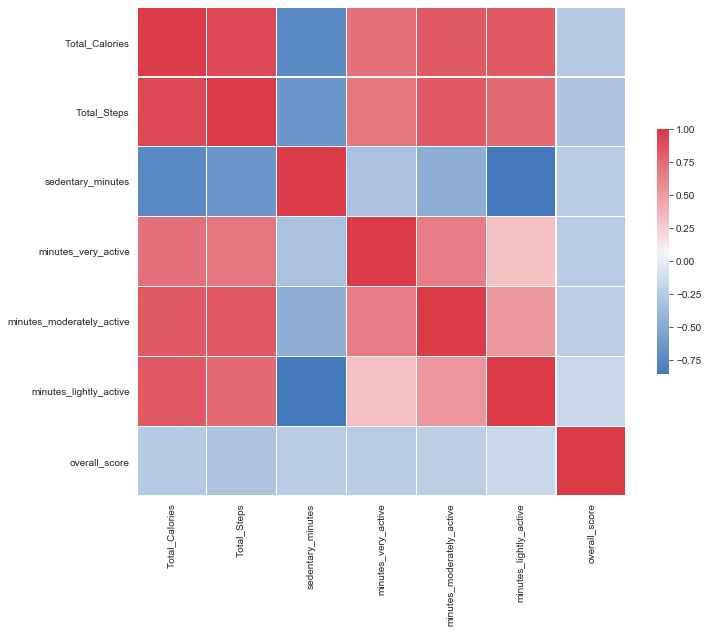

In [61]:
corrdf_calories = new_df[['Total_Calories','Total_Steps', 'is_weekend', 'sedentary_minutes', 'minutes_very_active', 
                            'minutes_moderately_active', 'minutes_lightly_active', 'resting_heart_rate', 'overall_score']]

import seaborn as sns
import matplotlib.pyplot as plt
def CorrMtx(df, dropDuplicates = True):

    # Your dataset is already a correlation matrix.
    # If you have a dateset where you need to include the calculation
    # of a correlation matrix, just uncomment the line below:
    df = df.corr()

    # Exclude duplicate correlations by masking uper right values
    if dropDuplicates:    
        mask = np.zeros_like(df, dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True

    # Set background color / chart style
    sns.set_style(style = 'white')

    # Set up  matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Add diverging colormap from red to blue
    cmap = sns.diverging_palette(250, 10, as_cmap=True)
    # Draw correlation plot with or without duplicates
    if dropDuplicates:
        sns.heatmap(df, mask=mask, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)
    else:
        sns.heatmap(df, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)


CorrMtx(corrdf_calories, dropDuplicates = False)

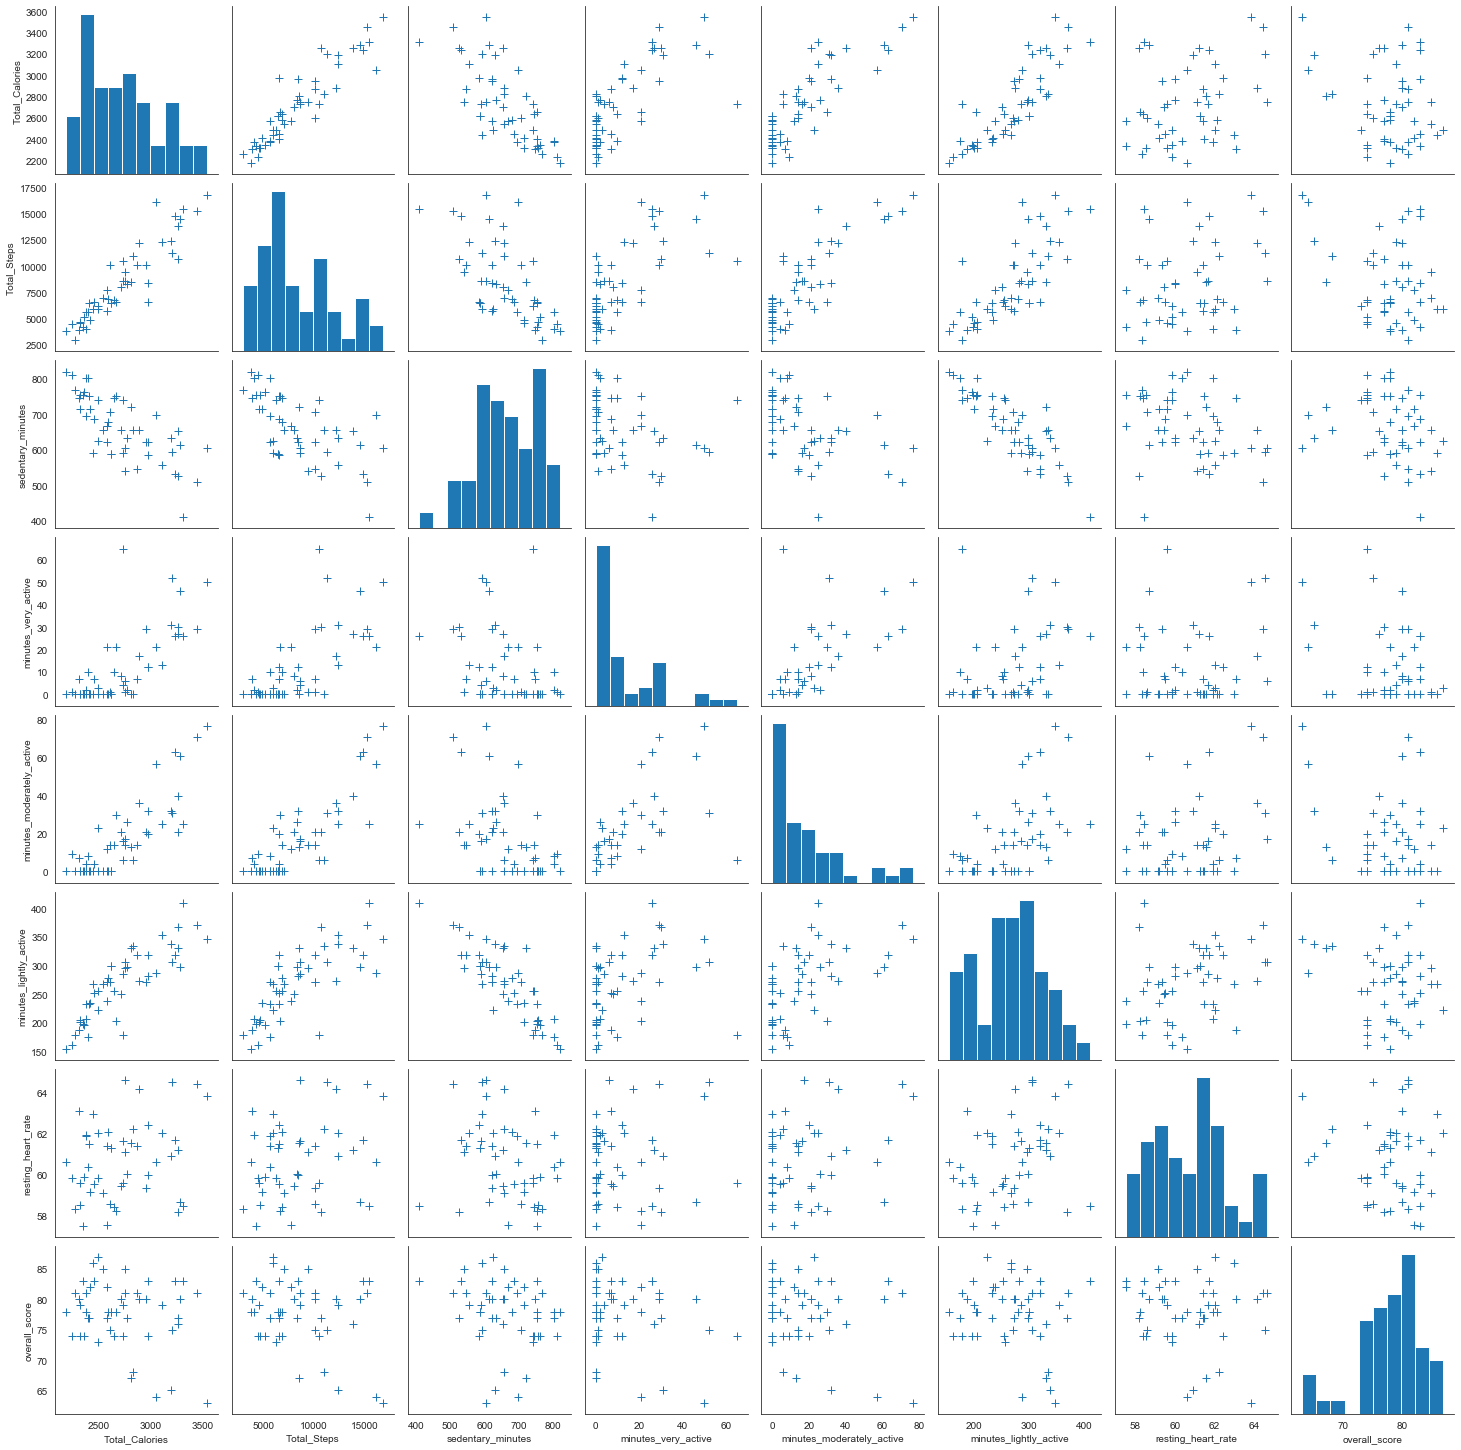

In [62]:
sns.pairplot(corrdf_calories.dropna(), kind="scatter", markers="+", plot_kws=dict(s=50, edgecolor="b", linewidth=1))
plt.show()

Text(0, 0.5, 'Minutes Sedentary')

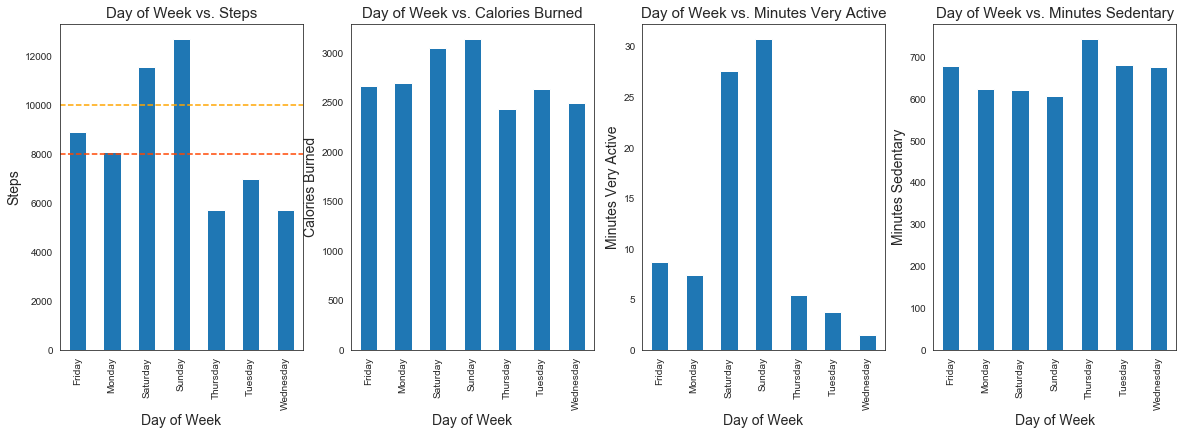

In [63]:
fig = plt.figure(figsize = (20,6))

ax = plt.subplot(141)  
new_df.groupby('day').Total_Steps.mean().plot.bar()
plt.title('Day of Week vs. Steps', fontsize=15)
plt.xlabel('Day of Week', fontsize=14)
plt.ylabel('Steps', fontsize=14)
ax.axhline(8000, color="orangered", linestyle='--')
ax.axhline(10000, color="orange", linestyle='--')

ax2 = fig.add_subplot(142)
new_df.groupby('day').Total_Calories.mean().plot.bar()
plt.title('Day of Week vs. Calories Burned', fontsize=15)
plt.xlabel('Day of Week', fontsize=14)
plt.ylabel('Calories Burned', fontsize=14)

ax3 = fig.add_subplot(143)
new_df.groupby('day').minutes_very_active.mean().plot.bar()
plt.title('Day of Week vs. Minutes Very Active', fontsize=15)
plt.xlabel('Day of Week', fontsize=14)
plt.ylabel('Minutes Very Active', fontsize=14)

ax4 = fig.add_subplot(144)
new_df.groupby('day').sedentary_minutes.mean().plot.bar()
plt.title('Day of Week vs. Minutes Sedentary', fontsize=15)
plt.xlabel('Day of Week', fontsize=14)
plt.ylabel('Minutes Sedentary', fontsize=14)

In [65]:
new_df.groupby('day').resting_heart_rate.mean().plot.line()
plt.title('Day of Week vs. Resting Heart Rate', fontsize=15)
plt.xlabel('Day of Week', fontsize=14)
plt.ylabel('Resting Heart Rate', fontsize=14)

DataError: No numeric types to aggregate

In [66]:
new_df['minutes_asleep'] = new_df['deep'] + new_df['wake'] + new_df['light'] + new_df['rem']

/Users/lysi2/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [67]:
new_df = new_df.replace("", 0)

In [68]:
new_df = new_df.reset_index()

In [69]:
for i in range(len(new_df)):
    if new_df['minutes_asleep'][i] == 0:
        new_df['minutes_asleep'][i] = new_df['asleep'][i]

In [70]:
new_df.head()

index   dateTime  sedentary_minutes  minutes_very_active  \
0      2 2020-05-27              801.0                 10.0   
1      3 2020-05-28              622.0                 29.0   
2      4 2020-05-29              763.0                  0.0   
3      5 2020-05-30              741.0                 65.0   
4      6 2020-05-31              811.0                  1.0   

   minutes_moderately_active  minutes_lightly_active  Total_Steps  \
0                        8.0                   175.0       5604.0   
1                       21.0                   272.0      10072.0   
2                        0.0                   196.0       5138.0   
3                        6.0                   178.0      10473.0   
4                        9.0                   162.0       4463.0   

   Total_Calories  Total_Distance  overall_score  ...  is_weekend  \
0         2387.63        472130.0           77.0  ...           N   
1         2949.08        710300.0           80.0  ...           N   
2         2348.20        380510.0           74.0  ...           N   
3         2732.76        776330.0           74.0  ...           Y   
4         2235.47        324050.0           74.0  ...           Y   

  success_steps deep wake  light  rem  restless  awake  asleep  minutes_asleep  
0             N  117   51    217   61         0      0       0             446  
1             Y  115   66    268   47         0      0       0             496  
2             N  115   75    226   65         0      0       0             481  
3             Y   91   60    250   49         0      0       0             450  
4             N  110   73    223   51         0      0       0             457  

[5 rows x 22 columns]

In [71]:
row = ((new_df.loc[new_df['deep'] == 0]))

In [72]:
sleep_perc_df = new_df[~new_df.index.isin(row.index)]

In [73]:
sleep_perc_df['deep_perc'] = sleep_perc_df['deep']/sleep_perc_df['minutes_asleep']
sleep_perc_df['wake_perc'] = sleep_perc_df['wake']/sleep_perc_df['minutes_asleep']
sleep_perc_df['light_perc'] = sleep_perc_df['light']/sleep_perc_df['minutes_asleep']
sleep_perc_df['rem_perc'] = sleep_perc_df['rem']/sleep_perc_df['minutes_asleep']

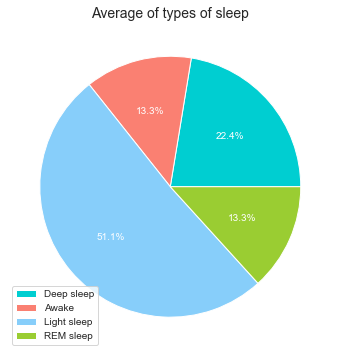

In [74]:
avg_perc_sleep = sleep_perc_df[['deep_perc', 'wake_perc', 'light_perc', 'rem_perc']].mean()

fig = plt.figure(figsize = (6,6))
labels=['Deep sleep', 'Awake', 'Light sleep', 'REM sleep']
plt.pie(avg_perc_sleep, colors = ['darkturquoise', 'salmon', 'lightskyblue', 'yellowgreen'], autopct='%1.1f%%', labels=labels, textprops=dict(color="w"))

# #carve the donut
# my_circle=plt.Circle( (0,0), 0.7, color='white')
# p=plt.gcf()
# p.gca().add_artist(my_circle)

plt.title('Average of types of sleep', fontsize=14)
plt.legend()
plt.show()

In [75]:
avg_perc_sleep

deep_perc     0.224188
wake_perc     0.132613
light_perc    0.510560
rem_perc      0.132639
dtype: float64

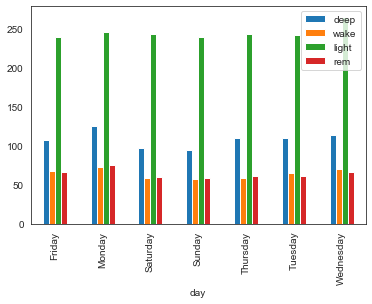

In [76]:
sleep_perc_df.groupby('day').mean()[["deep", "wake", "light", "rem"]].plot(kind='bar')

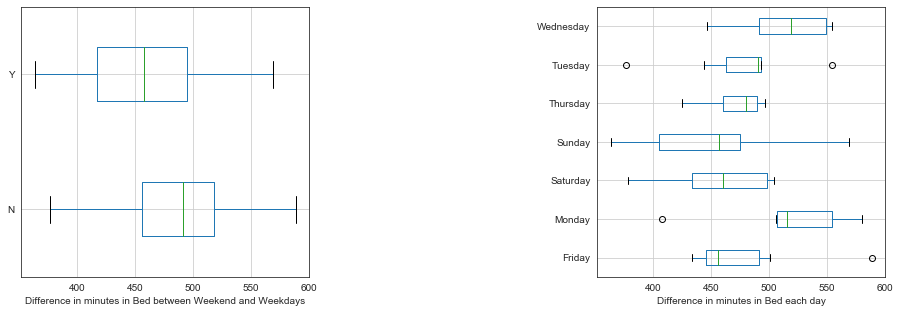

In [77]:
f = plt.figure(figsize=(15,5))

ax = f.add_subplot(121)
new_df.boxplot(column = 'minutes_asleep', by = 'is_weekend', vert = False, widths = 0.4, ax=ax)
plt.xlabel('Difference in minutes in Bed between Weekend and Weekdays')
plt.suptitle('')
plt.title('');

ax2 = f.add_subplot(122)
new_df.boxplot(column = 'minutes_asleep', by = 'day', vert = False, widths = 0.4, ax=ax2)
plt.xlabel('Difference in minutes in Bed each day')
plt.suptitle('')
plt.title('');

plt.subplots_adjust(wspace = 1)

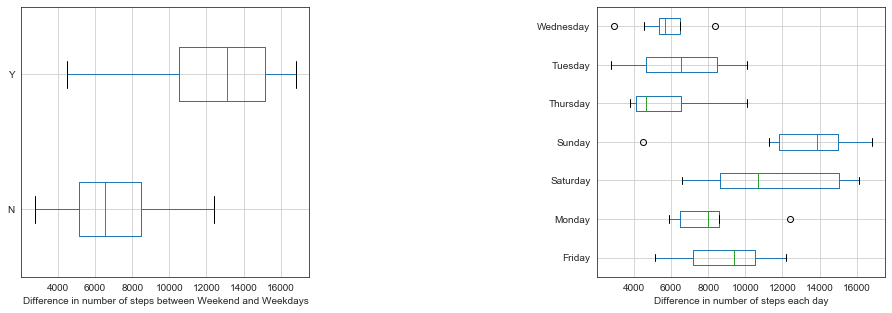

In [78]:
f = plt.figure(figsize=(15,5))

ax = f.add_subplot(121) 
final_df.boxplot(column = 'Total_Steps', by = 'is_weekend', vert = False, widths = 0.4, ax=ax)
plt.xlabel('Difference in number of steps between Weekend and Weekdays')
plt.suptitle('')
plt.title('');

ax2 = f.add_subplot(122) 
final_df.boxplot(column = 'Total_Steps', by = 'day', vert = False, widths = 0.4, ax=ax2)
plt.xlabel('Difference in number of steps each day')
plt.suptitle('')
plt.title('');

plt.subplots_adjust(wspace = 1)

## Machine Learning

In [79]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [80]:
from sklearn.preprocessing import LabelEncoder

number = LabelEncoder()
new_df['day_num'] = number.fit_transform(new_df['day'].astype("str"))

In [81]:
X = new_df[['day_num', 'Total_Steps', 'sedentary_minutes', 'minutes_lightly_active', 'minutes_moderately_active', 
            'minutes_very_active', 'overall_score', 'resting_heart_rate']]
X.fillna(X.mean(), inplace=True)

threshold = 2000

Y = new_df['Total_Calories'] > threshold
#Y = final_df['success']

print('X shape: {}'.format(X.shape))
print('Y shape: {}'.format(Y.shape))

x_train, x_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 42)
print('X_train shape: {}. X_test shape: {}'.format(x_train.shape, x_test.shape))

X shape: (50, 8)
Y shape: (50,)
X_train shape: (35, 8). X_test shape: (15, 8)


/Users/lysi2/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [82]:
clf_final = tree.DecisionTreeClassifier(random_state=42)
clf_final.fit(x_train, y_train)
y_pred = clf.predict(x_test)
fig, ax = plt.subplots(figsize=(12, 12))
out = tree.plot_tree(clf_final, feature_names=list(x_train), filled = True)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
plt.show()

NameError: name 'clf' is not defined

In [286]:
from sklearn.tree.export import export_text
tree_rules = export_text(clf_final, feature_names=list(x_train))

In [287]:
tree_rules

'|--- Total_Steps <= 10165.50\n|   |--- minutes_lightly_active <= 265.50\n|   |   |--- class: False\n|   |--- minutes_lightly_active >  265.50\n|   |   |--- minutes_moderately_active <= 2.50\n|   |   |   |--- minutes_lightly_active <= 342.50\n|   |   |   |   |--- class: False\n|   |   |   |--- minutes_lightly_active >  342.50\n|   |   |   |   |--- class: True\n|   |   |--- minutes_moderately_active >  2.50\n|   |   |   |--- class: True\n|--- Total_Steps >  10165.50\n|   |--- minutes_lightly_active <= 173.00\n|   |   |--- class: False\n|   |--- minutes_lightly_active >  173.00\n|   |   |--- class: True\n'

In [282]:
train_accuracy = clf.score(x_train, y_train) 
val_accuracy = clf.score(x_test, y_test) 
[train_accuracy,val_accuracy]

[1.0, 0.9444444444444444]

In [284]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9444444444444444

In [251]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(x_train, y_train)

# Make predictions using the testing set
lr_y_pred = regr.predict(x_test)
                        
print("Mean squared error: %.2f"% mean_squared_error(y_test, lr_y_pred))
#coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(regr.coef_))], axis = 1)
#coefficients
print("r2_error: %.2f"% r2_score(y_test, lr_y_pred))

Mean squared error: 0.10
r2_error: 0.54


In [86]:
path = '/users/hi/'
def read_file(name):
#     name = pd.read_csv(path + 'combined_{}.csv'.format(name))
    print(path + 'combined_{}.csv'.format(name))

read_file('yooo')


/users/hi/combined_yooo.csv
